autor: Bruno Gonçalves Pereira
University of Sao Paulo, Oceanographic Institute

In [1]:
%matplotlib inline

# import libraries to read and plot statistical analyses of marine satellite data

import xarray as xr # netcdf4 library
import warnings
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cmo
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
#from scipy.ndimage.filters import gaussian_filter
#import seawater as sw
import numpy as np

#### Load Sea Surface Temperature (SST) OSTIA rep-data ##### 

Os dados reprocessados do programa copernicus podem ser usados como exemplos para observaçao de séries climátológicas, a alta
resoluçao espacial.

https://resources.marine.copernicus.eu/product-detail/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011/INFORMATION

In [2]:
source = xr.open_mfdataset('/home/br/git/CMEMS/ostia_data/SST*',concat_dim='time') #open multifile data in your computer
source = source.assign({'analysed_sst':source.analysed_sst-273}) # kelvin to celsius step
source.close()

In [3]:
# explore as variaveis e atributos dos dados de SST voce pode ter acesso a informaçoes importantes
# e caracteristicas

#print(source)
#print(source.var)
#print(source.attrs)

Gridded Bathymetry Data, GEBCO - IOC/UNESCO dataset 

https://www.gebco.net/data_and_products/gridded_bathymetry_data/#global


In [4]:
#  load/carregue os dados batimetria

dado = xr.open_dataset('/home/br/git/CMEMS/gebco-data/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

bat = dado.interp({'lon':source.lon, 'lat':source.lat}).elevation

dado.close()

#### make a mask  - spatial selection

Seleçao de área: Aqui definimos nossa porção final de análise, uma área que corresponde a região costeira no litoral sudeste com definida por uma batimetria menor que 200.

Chuí to SBS (21/23 S- 33.41 E)



In [28]:
#mask
#mask_sst = source.analysed_sst.sel(lon=slice(-55.0, -40.0), lat=slice(-33.4, -23.0)).where((bat>-200)&(bat<-10 ))
mask_sst_1 = source.analysed_sst.sel(lon=slice(-55.0, -40.0), lat=slice(-33.4, -21.0)).where((bat>-200)&(bat<-10 ))


#### mapas usando a biblioteca/librarie matplotlib

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


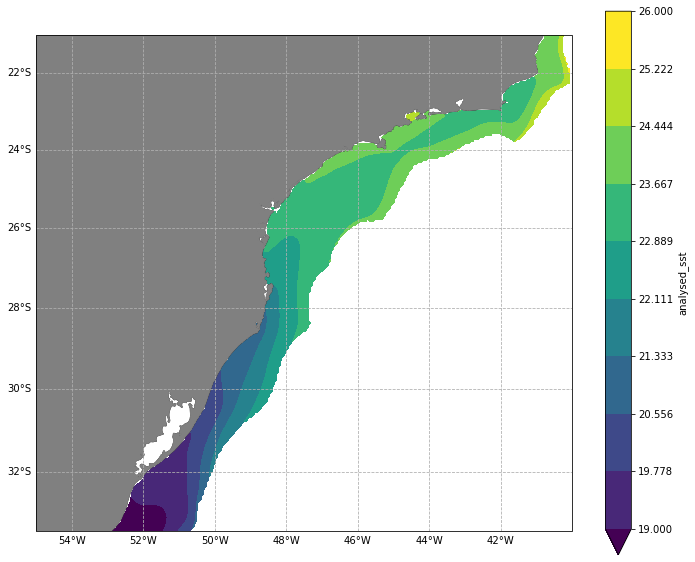

In [42]:
land = cfeature.NaturalEarthFeature(
    'physical','land','10m',edgecolor='face',facecolor='0.5'
)

proj = ccrs.Mercator()

kw = dict(transform=ccrs.PlateCarree())


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1,1,1,projection=proj)
mask_sst_1.mean('time').plot.contourf(ax=ax,vmin=19,vmax=26,levels=10,**kw)

#ax.plot([-48.25,-46.20],[-26,-26],color='red',**kw,zorder=1e3)
ax.coastlines()
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True,linestyle='--')
gl.top_labels = False
gl.right_labels = False
ax.set_extent([
    -55, -40,
    -33.4, -21
],crs=ccrs.PlateCarree())

#### Agrupamentos a partir do programa groubby

possibilidade de agrupamentos dos dados:

ex: dataset. groupby("time.month").mean() para dados mensais

 time season group - Aqui temos a média para as 4 estações, ou seja, temos a estação média para a série temporal

In [29]:
# groupby

mean_sst = mask_sst.sel(time=slice('1982','2019')).groupby('time.year').mean('time')

mean_sst_1 = mask_sst_1.sel(time=slice('1982','2019')).groupby('time.year').mean('time')


mask_sst.close()
mask_sst_1.close()

In [26]:

with ProgressBar():
        ymean_sst = mean_sst.mean(['lon','lat']).compute()
        
mean_sst.close()

[#########################               ] | 63% Completed | 35.9s

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 43.5s


In [31]:
with ProgressBar():
        ymean_sst_1 = mean_sst_1.mean(['lon','lat']).compute()
        
mean_sst_1.close()

[#########################               ] | 62% Completed | 44.6s

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 58.3s


seleçao dos dados para cada ano

In [109]:
sst_1982 = mask_sst.sel(time=slice('1982')).groupby('time.month').mean('time')
sst_1983 = mask_sst.sel(time=slice('1983')).groupby('time.month').mean('time')
sst_1984 = mask_sst.sel(time=slice('1984')).groupby('time.month').mean('time')
sst_1985 = mask_sst.sel(time=slice('1985')).groupby('time.month').mean('time')
sst_1986 = mask_sst.sel(time=slice('1986')).groupby('time.month').mean('time')
sst_1987 = mask_sst.sel(time=slice('1987')).groupby('time.month').mean('time')
sst_1988 = mask_sst.sel(time=slice('1988')).groupby('time.month').mean('time')
sst_1989 = mask_sst.sel(time=slice('1989')).groupby('time.month').mean('time')
sst_1990 = mask_sst.sel(time=slice('1990')).groupby('time.month').mean('time')
sst_1991 = mask_sst.sel(time=slice('1991')).groupby('time.month').mean('time')
sst_1992 = mask_sst.sel(time=slice('1992')).groupby('time.month').mean('time')
sst_1993 = mask_sst.sel(time=slice('1993')).groupby('time.month').mean('time')
sst_1994 = mask_sst.sel(time=slice('1994')).groupby('time.month').mean('time')
sst_1995 = mask_sst.sel(time=slice('1995')).groupby('time.month').mean('time')
sst_1996 = mask_sst.sel(time=slice('1996')).groupby('time.month').mean('time')
sst_1997 = mask_sst.sel(time=slice('1997')).groupby('time.month').mean('time')
sst_1998 = mask_sst.sel(time=slice('1998')).groupby('time.month').mean('time')
sst_1999 = mask_sst.sel(time=slice('1999')).groupby('time.month').mean('time')
sst_2000 = mask_sst.sel(time=slice('2000')).groupby('time.month').mean('time')
sst_2001 = mask_sst.sel(time=slice('2001')).groupby('time.month').mean('time')
sst_2002 = mask_sst.sel(time=slice('2002')).groupby('time.month').mean('time')
sst_2003 = mask_sst.sel(time=slice('2003')).groupby('time.month').mean('time')
sst_2004 = mask_sst.sel(time=slice('2004')).groupby('time.month').mean('time')
sst_2005 = mask_sst.sel(time=slice('2005')).groupby('time.month').mean('time')
sst_2006 = mask_sst.sel(time=slice('2006')).groupby('time.month').mean('time')
sst_2007 = mask_sst.sel(time=slice('2007')).groupby('time.month').mean('time')
sst_2008 = mask_sst.sel(time=slice('2008')).groupby('time.month').mean('time')
sst_2009 = mask_sst.sel(time=slice('2009')).groupby('time.month').mean('time')
sst_2010 = mask_sst.sel(time=slice('2010')).groupby('time.month').mean('time')
sst_2011 = mask_sst.sel(time=slice('2011')).groupby('time.month').mean('time')
sst_2012 = mask_sst.sel(time=slice('2012')).groupby('time.month').mean('time')
sst_2013 = mask_sst.sel(time=slice('2013')).groupby('time.month').mean('time')
sst_2014 = mask_sst.sel(time=slice('2014')).groupby('time.month').mean('time')
sst_2015 = mask_sst.sel(time=slice('2015')).groupby('time.month').mean('time')
sst_2016 = mask_sst.sel(time=slice('2016')).groupby('time.month').mean('time')
sst_2017 = mask_sst.sel(time=slice('2017')).groupby('time.month').mean('time')
sst_2018 = mask_sst.sel(time=slice('2018')).groupby('time.month').mean('time')
sst_2019 = mask_sst.sel(time=slice('2019')).groupby('time.month').mean('time')

# with ProgressBar():
#     mean_m_sst = mon_sst.mean(['lon','lat']).compute()

plot

Text(0.5, 1.0, 'Média anual (1981 a 2019) de sst área 1 - chuí - CF')

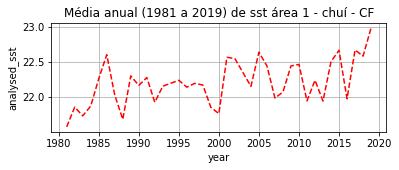

In [44]:
plt.figure(figsize=(6,2))
ymean_sst.plot(x ="year" , color='red',linestyle='--')
plt.grid()

plt.title('Média anual (1982 a 2019) de sst área 1 - chuí - CF')

Text(0.5, 1.0, 'Média anual (1981 a 2019) de sst - área 2 - chuí - CS')

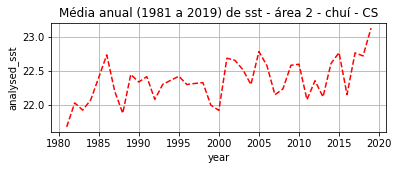

In [43]:
plt.figure(figsize=(6,2))
ymean_sst_1.plot(x ="year" , color='red',linestyle='--')
plt.grid()

plt.title('Média anual (1982 a 2019) de sst - área 2 - chuí - CS')

transformando em series

In [105]:
sst_serie = ymean_sst.to_series()
#sst_serie.to_csv('sst_time_series_from_netcdf.csv')
#ls

In [106]:
sst_serie_1 = ymean_sst_1.to_series()
#sst_serie.to_csv('sst_time_series_from_netcdf.csv')
#ls

In [110]:
sst_serie_1982 = sst_1982.to_series()
sst_serie_1983 = sst_1983.to_series()
sst_serie_1984 = sst_1984.to_series()
sst_serie_1985 = sst_1985.to_series()
sst_serie_1986 = sst_1982.to_series()
sst_serie_1987 = sst_1987.to_series()
sst_serie_1988 = sst_1988.to_series()
sst_serie_1989 = sst_1989.to_series()
sst_serie_1990 = sst_1990.to_series()
sst_serie_1991 = sst_1991.to_series()
sst_serie_1992 = sst_1992.to_series()
sst_serie_1993 = sst_1993.to_series()
sst_serie_1994 = sst_1994.to_series()
sst_serie_1995 = sst_1995.to_series()
sst_serie_1996 = sst_1996.to_series()
sst_serie_1997 = sst_1997.to_series()
sst_serie_1998 = sst_1998.to_series()
sst_serie_1999 = sst_1999.to_series()
sst_serie_2000 = sst_2000.to_series()
sst_serie_2001 = sst_2001.to_series()
sst_serie_2002 = sst_2002.to_series()
sst_serie_2003 = sst_2003.to_series()
sst_serie_2004 = sst_2004.to_series()
sst_serie_2005 = sst_2005.to_series()
sst_serie_2006 = sst_2006.to_series()
sst_serie_2007 = sst_2007.to_series()
sst_serie_2008 = sst_2008.to_series()
sst_serie_2009 = sst_2009.to_series()
sst_serie_2010 = sst_2010.to_series()
sst_serie_2011 = sst_2011.to_series()
sst_serie_2012 = sst_2012.to_series()
sst_serie_2013 = sst_2013.to_series()
sst_serie_2014 = sst_2014.to_series()
sst_serie_2015 = sst_2015.to_series()
sst_serie_2016 = sst_2016.to_series()
sst_serie_2017 = sst_2017.to_series()
sst_serie_2018 = sst_2018.to_series()
sst_serie_2019 = sst_2019.to_series()

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [102]:
print(sst_serie_1)

year
1981    21.684380
1982    22.034033
1983    21.929218
1984    22.078423
1985    22.404959
1986    22.735401
1987    22.201588
1988    21.882835
1989    22.449450
1990    22.339277
1991    22.417402
1992    22.084839
1993    22.305733
1995    22.423290
1996    22.302540
1997    22.317646
1998    22.330458
1999    22.000273
2000    21.925346
2001    22.685957
2002    22.655947
2003    22.519024
2004    22.302319
2005    22.783518
2006    22.576880
2007    22.152983
2008    22.239508
2009    22.583242
2010    22.598516
2011    22.080912
2012    22.357769
2013    22.122206
2014    22.609943
2015    22.767616
2016    22.156197
2017    22.763826
2018    22.719877
2019    23.126991
Name: analysed_sst, dtype: float32


In [48]:
print(sst_serie)

year
1981    21.575003
1982    21.856413
1983    21.732306
1984    21.871937
1985    22.260347
1986    22.603249
1987    22.027908
1988    21.682940
1989    22.301521
1990    22.165550
1991    22.278187
1992    21.925695
1993    22.154480
1995    22.238691
1996    22.140881
1997    22.195074
1998    22.170605
1999    21.852819
2000    21.763037
2001    22.566441
2002    22.547516
2003    22.349632
2004    22.152517
2005    22.639328
2006    22.443308
2007    21.985889
2008    22.071655
2009    22.443102
2010    22.464785
2011    21.945206
2012    22.238890
2013    21.942488
2014    22.505749
2015    22.665915
2016    21.975235
2017    22.670330
2018    22.583138
2019    22.983593
Name: analysed_sst, dtype: float32


estatistica

medias anuais,
medianas (anuais), 
desvios padrão, 
mínimos e máximos para cada uma das grandes areas.
variancia

In [74]:

#variância: média dos desvios quadráticos area 1
print('variancia area 1')
print(np.var(sst_serie))

#variância: média dos desvios quadráticos area 2
print('variancia area 2')
print(np.var(sst_serie_1))

área 1 - minimo
22.983592987060547
área 2 - minimo
23.126991271972656
variancia area 1
0.10279392451047897
variancia area 2
0.0931679904460907


maximos e minimos

In [76]:
#maximo
print('área 1 - minimo')
print(np.max(sst_serie))

print('área 2 - minimo')
print(np.max(sst_serie_1))

#minimo
print('área 1 - minimo')
print(np.min(sst_serie))

print('área 2 - minimo')
print(np.min(sst_serie_1))

área 1 - minimo
22.983592987060547
área 2 - minimo
23.126991271972656
área 1 - minimo
21.575002670288086
área 2 - minimo
21.68437957763672


## desvio padrao

In [68]:
#desvio padrão: raiz quadrada da variância
print(np.std(sst_serie))


0.32061490416526794


In [62]:
#desvio padrão: raiz quadrada da variância
print(np.std(sst_serie_1))

0.30523431301116943


## describe

In [63]:
print(sst_serie.describe())

count    38.000000
mean     22.209772
std       0.324919
min      21.575003
25%      21.952713
50%      22.182839
75%      22.459415
max      22.983593
Name: analysed_sst, dtype: float64


In [64]:
print(sst_serie_1.describe())

count    38.000000
mean     22.359219
std       0.309332
min      21.684380
25%      22.129900
50%      22.334867
75%      22.594698
max      23.126991
Name: analysed_sst, dtype: float64


## mediana

In [79]:
print('mediana área 1')
print(np.median(sst_serie))

mediana área 1
22.182838


In [80]:
print('mediana área 2')
print(np.median(sst_serie_1))

mediana área 2
22.334867


exportando para csv

In [81]:
sst_serie.to_csv('area1_ymedias.csv')
sst_serie.to_csv('area2_ymedias.csv')

### estatisticas para cada ano

In [115]:
#variância: média dos desvios quadráticos area 1
print('variancia 2019')
print(np.var(sst_serie_2019))
print('variancia 2018')
print(np.var(sst_serie_2018))
print('variancia 2017')
print(np.var(sst_serie_2017))
print('variancia 2016')
print(np.var(sst_serie_2016))
print('variancia 2015')
print(np.var(sst_serie_2015))
print('variancia 2014')
print(np.var(sst_serie_2014))
print('variancia 2013')
print(np.var(sst_serie_2013))
print('variancia 2012')
print(np.var(sst_serie_2012))
print('variancia 2011')
print(np.var(sst_serie_2011))
print('variancia 2010')
print(np.var(sst_serie_2010))
print('variancia 2009')
print(np.var(sst_serie_2009))
print('variancia 2008')
print(np.var(sst_serie_2008))
print('variancia 2007')
print(np.var(sst_serie_2007))
print('variancia 2006')
print(np.var(sst_serie_2006))
print('variancia 2005')
print(np.var(sst_serie_2005))
print('variancia 2004')
print(np.var(sst_serie_2004))
print('variancia 2003')
print(np.var(sst_serie_2003))
print('variancia 2002')
print(np.var(sst_serie_2002))
print('variancia 2001')
print(np.var(sst_serie_2001))
print('variancia 2000')
print(np.var(sst_serie_2000))
print('variancia 1999')
print(np.var(sst_serie_1999))
print('variancia 1998')
print(np.var(sst_serie_1998))
print('variancia 1997')
print(np.var(sst_serie_1997))
print('variancia 1996')
print(np.var(sst_serie_1996))
print('variancia 1995')
print(np.var(sst_serie_1995))
print('variancia 1994')
print(np.var(sst_serie_1994))
print('variancia 1993')
print(np.var(sst_serie_1993))
print('variancia 1992')
print(np.var(sst_serie_1992))
print('variancia 1991')
print(np.var(sst_serie_1991))
print('variancia 1990')
print(np.var(sst_serie_1990))
print('variancia 1989')
print(np.var(sst_serie_1989))
print('variancia 1988')
print(np.var(sst_serie_1988))
print('variancia 1987')
print(np.var(sst_serie_1987))
print('variancia 1986')
print(np.var(sst_serie_1986))
print('variancia 1985')
print(np.var(sst_serie_1985))
print('variancia 1984')
print(np.var(sst_serie_1984))
print('variancia 1983')
print(np.var(sst_serie_1983))
print('variancia 1982')
print(np.var(sst_serie_1982))

variancia 2019
10.31223201751709
variancia 2018
10.27947998046875
variancia 2017
10.261739730834961
variancia 2016
10.327219009399414
variancia 2015
10.21193790435791
variancia 2014
10.25206470489502
variancia 2013
10.301718711853027
variancia 2012
10.276721000671387
variancia 2011
10.356340408325195
variancia 2010
10.340032577514648
variancia 2009
10.273116111755371
variancia 2008
10.272871971130371
variancia 2007
10.327629089355469
variancia 2006
10.196871757507324
variancia 2005
10.189711570739746
variancia 2004
10.287843704223633
variancia 2003
10.38528823852539
variancia 2002
10.314038276672363
variancia 2001
10.319321632385254
variancia 2000
10.364278793334961
variancia 1999
10.30353832244873
variancia 1998
10.246255874633789
variancia 1997
10.262555122375488
variancia 1996
10.429838180541992
variancia 1995
10.292096138000488
variancia 1994
10.173418998718262
variancia 1993
10.173418998718262
variancia 1992
9.914937019348145
variancia 1991
10.048126220703125
variancia 1990
10.232

In [116]:
print('std - desvio padrao 2019')
print(np.std(sst_serie_2019))
print('std - desvio padrao 2018')
print(np.std(sst_serie_2018))
print('std - desvio padrao 2017')
print(np.std(sst_serie_2017))
print('std - desvio padrao 2016')
print(np.std(sst_serie_2016))
print('std - desvio padrao 2015')
print(np.std(sst_serie_2015))
print('std - desvio padrao 2014')
print(np.std(sst_serie_2014))
print('std - desvio padrao 2013')
print(np.std(sst_serie_2013))
print('std - desvio padrao 2012')
print(np.std(sst_serie_2012))
print('std - desvio padrao 2011')
print(np.std(sst_serie_2011))
print('std - desvio padrao 2010')
print(np.std(sst_serie_2010))
print('std - desvio padrao 2009')
print(np.std(sst_serie_2009))
print('std - desvio padrao 2008')
print(np.std(sst_serie_2008))
print('std - desvio padrao 2007')
print(np.std(sst_serie_2007))
print('std - desvio padrao 2006')
print(np.std(sst_serie_2006))
print('std - desvio padrao 2005')
print(np.std(sst_serie_2005))
print('std - desvio padrao 2004')
print(np.std(sst_serie_2004))
print('std - desvio padrao 2003')
print(np.std(sst_serie_2003))
print('std - desvio padrao 2002')
print(np.std(sst_serie_2002))
print('std - desvio padrao 2001')
print(np.std(sst_serie_2001))
print('std - desvio padrao 2000')
print(np.std(sst_serie_2000))
print('std - desvio padrao 1999')
print(np.std(sst_serie_1999))
print('std - desvio padrao 1998')
print(np.std(sst_serie_1998))
print('std - desvio padrao 1997')
print(np.std(sst_serie_1997))
print('std - desvio padrao 1996')
print(np.std(sst_serie_1996))
print('std - desvio padrao 1995')
print(np.std(sst_serie_1995))
print('std - desvio padrao 1994')
print(np.std(sst_serie_1994))
print('std - desvio padrao 1993')
print(np.std(sst_serie_1993))
print('std - desvio padrao 1992')
print(np.std(sst_serie_1992))
print('std - desvio padrao 1991')
print(np.std(sst_serie_1991))
print('std - desvio padrao 1990')
print(np.std(sst_serie_1990))
print('std - desvio padrao 1989')
print(np.std(sst_serie_1989))
print('std - desvio padrao 1988')
print(np.std(sst_serie_1988))
print('std - desvio padrao 1987')
print(np.std(sst_serie_1987))
print('std - desvio padrao 1986')
print(np.std(sst_serie_1986))
print('std - desvio padrao 1985')
print(np.std(sst_serie_1985))
print('std - desvio padrao 1984')
print(np.std(sst_serie_1984))
print('std - desvio padrao 1983')
print(np.std(sst_serie_1983))
print('std - desvio padrao 1982')
print(np.std(sst_serie_1982))

variancia 2019
3.21126651763916
variancia 2018
3.206162929534912
variancia 2017
3.203395128250122
variancia 2016
3.2135989665985107
variancia 2015
3.1956121921539307
variancia 2014
3.2018845081329346
variancia 2013
3.2096290588378906
variancia 2012
3.205732583999634
variancia 2011
3.2181267738342285
variancia 2010
3.2155921459198
variancia 2009
3.205170154571533
variancia 2008
3.205132246017456
variancia 2007
3.21366286277771
variancia 2006
3.193253993988037
variancia 2005
3.1921327114105225
variancia 2004
3.2074668407440186
variancia 2003
3.222621440887451
variancia 2002
3.211547613143921
variancia 2001
3.2123701572418213
variancia 2000
3.219360113143921
variancia 1999
3.2099125385284424
variancia 1998
3.200977325439453
variancia 1997
3.203522205352783
variancia 1996
3.2295260429382324
variancia 1995
3.208129644393921
variancia 1994
3.189579725265503
variancia 1993
3.189579725265503
variancia 1992
3.148799180984497
variancia 1991
3.1698780059814453
variancia 1990
3.198796272277832
var

In [117]:
print('variancia 2019')
print(np.median(sst_serie_2019))
print('variancia 2018')
print(np.median(sst_serie_2018))
print('variancia 2017')
print(np.median(sst_serie_2017))
print('variancia 2016')
print(np.median(sst_serie_2016))
print('variancia 2015')
print(np.median(sst_serie_2015))
print('variancia 2014')
print(np.median(sst_serie_2014))
print('variancia 2013')
print(np.median(sst_serie_2013))
print('variancia 2012')
print(np.median(sst_serie_2012))
print('variancia 2011')
print(np.median(sst_serie_2011))
print('variancia 2010')
print(np.median(sst_serie_2010))
print('variancia 2009')
print(np.median(sst_serie_2009))
print('variancia 2008')
print(np.median(sst_serie_2008))
print('variancia 2007')
print(np.median(sst_serie_2007))
print('variancia 2006')
print(np.median(sst_serie_2006))
print('variancia 2005')
print(np.median(sst_serie_2005))
print('variancia 2004')
print(np.median(sst_serie_2004))
print('vamedianncia 2003')
print(np.median(sst_serie_2003))
print('variancia 2002')
print(np.median(sst_serie_2002))
print('variancia 2001')
print(np.median(sst_serie_2001))
print('variancia 2000')
print(np.median(sst_serie_2000))
print('variancia 1999')
print(np.median(sst_serie_1999))
print('variancia 1998')
print(np.median(sst_serie_1998))
print('variancia 1997')
print(np.median(sst_serie_1997))
print('variancia 1996')
print(np.median(sst_serie_1996))
print('variancia 1995')
print(np.median(sst_serie_1995))
print('variancia 1994')
print(np.median(sst_serie_1994))
print('variancia 1993')
print(np.median(sst_serie_1993))
print('variancia 1992')
print(np.median(sst_serie_1992))
print('variancia 1991')
print(np.median(sst_serie_1991))
print('variancia 1990')
print(np.median(sst_serie_1990))
print('variancia 1989')
print(np.median(sst_serie_1989))
print('variancia 1988')
print(np.median(sst_serie_1988))
print('variancia 1987')
print(np.median(sst_serie_1987))
print('variancia 1986')
print(np.median(sst_serie_1986))
print('variancia 1985')
print(np.median(sst_serie_1985))
print('variancia 1984')
print(np.median(sst_serie_1984))
print('variancia 1983')
print(np.median(sst_serie_1983))
print('variancia 1982')
print(np.median(sst_serie_1982))

variancia 2019
nan
variancia 2018
nan
variancia 2017
nan
variancia 2016
nan
variancia 2015
nan
variancia 2014
nan
variancia 2013
nan
variancia 2012
nan
variancia 2011
nan
variancia 2010
nan
variancia 2009
nan
variancia 2008
nan
variancia 2007
nan
variancia 2006
nan
variancia 2005
nan
variancia 2004
nan
vamedianncia 2003
nan
variancia 2002
nan
variancia 2001
nan
variancia 2000
nan
variancia 1999
nan
variancia 1998
nan
variancia 1997
nan
variancia 1996
nan
variancia 1995
nan
variancia 1994
nan
variancia 1993
nan
variancia 1992
nan
variancia 1991
nan
variancia 1990
nan
variancia 1989
nan
variancia 1988
nan
variancia 1987
nan
variancia 1986
nan
variancia 1985
nan
variancia 1984
nan
variancia 1983
nan
variancia 1982
nan


In [114]:
#variância: média dos desvios quadráticos area 1
print('variancia')
print(np.var(sst_serie))

#maximo
print('max')
print(np.max(sst_serie))

#minimo
print('min')
print(np.min(sst_serie))

#desvio padrão: raiz quadrada da variância
print('desvio padrao')
print(np.std(sst_serie))


# mediana
print('mediana área 1')
print(np.median(sst_serie))

variancia
10.31223201751709
